# (Part 2) Process of forecasting the output electricity for power plant working in combined cycle by the linear regression equation 

Correctly carried out linear regression model is the mapping of reality. It can be used to diagnostic systems, to prevent failures or even installation stoppage. Monitoring of the production process by the regression model is effective form of prevention of problems.

In the previous part of this publication I showed how to compose linear regression model. Now we will concentrate on variables analyses.
Let's remind fundamental rules of linear regression model.


Failure to comply of these rules lead to wrong, misleading result of model calculation.

1. There are no correlation between descriptive variables (independent variables)
2. There are exist linear relationship between predictive and result variables.
3. The errors from the model should have normal distribution.
4. Homogeneous of error variance
5. Lack of correlation between errors. Errors from one observation should be independent to errors from other observation.

We load needed libraries and Database.

# Parameters of multi factor regression model

We load needed libraries and Database.

In [3]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
## https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

df = pd.read_excel('c:/1/Folds5x2_pp.xlsx')

df.columns = ['Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 'Relative_Humidity', 'Energy_output']

We create multi factor regression model.

In [4]:
lm = smf.ols(formula = 'Energy_output ~ Temperature + Exhaust_Vacuum + Relative_Humidity + Ambient_Pressure', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Energy_output   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:01:48   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           454.6093      9.749     46.634      0.000     435.500     473.718
Temperature          -1.9775      0.015   -129.342      0.000      -2.007      -1.948
Exhaust_Vacuum       -0.2339      0.007    -32.122      0.000      -0.248      -0.220
Relative_Humidity    -0.1581      0.004    -37.918      0.000      -0.166      -0.150
Ambient_Pressure      0.0621      0.009      6.564      0.000       0.044       0.081
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
coef = lm.params.to_dict()

Now we can recall any coefficient of descriptive variables.

In [6]:
coef['Temperature']

-1.977513106635385

In [7]:
coef['Intercept']

454.6092743153056

# Displaying the rests (errors) of the model

The Results from the model (the error of the prediction) it is different between empirical values and their theoretical prediction come from the regression model.

In [8]:
lm.resid.sample(6)

2922    2.484973
5860    4.214192
2534   -7.031075
5202   -3.479953
3076   -5.572512
7444    4.709399
dtype: float64

# Displaying the result of model prediction 

We generate predicted values from the model.

In [9]:
lm.predict()

array([467.26978996, 444.0773659 , 483.56264263, ..., 432.40579787,
       443.03667582, 449.69603741])

We create additional columns in Dataframe who contain prediction and values of rests, that is the difference between empirical values and their estimation.

In [10]:
df['Predict'] = pd.Series(lm.predict())
df['Resid'] = pd.Series(lm.resid)
df.sample(8)[['Energy_output','Predict','Resid']]

,Energy_output,Predict,Resid
4620,463.68,468.239190,-4.559190
4330,489.03,481.338666,7.691334
320,455.28,450.579079,4.700921
9108,449.93,450.440091,-0.510091
991,446.80,450.080389,-3.280389
8617,447.22,450.579220,-3.359220
9247,442.73,445.176771,-2.446771
3171,425.14,430.794283,-5.654283


# Analyze of normal distribution of the rest from the model

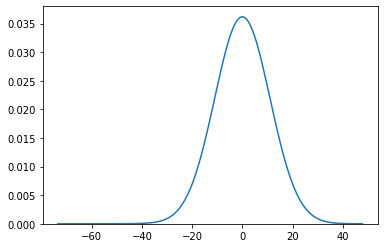

In [11]:
sns.kdeplot(np.array(df['Resid']), bw=10)

On this plot of normal distribution is worrying the left tail of the plot, is to long.

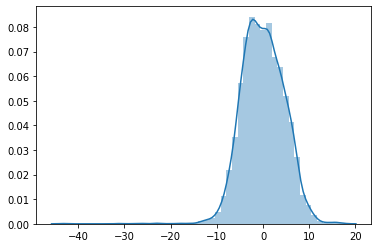

In [12]:
sns.distplot(np.array(df['Resid']))

# Anderson-Darling normality test

Test Anderson-Darling was elaborated by Teodora Andersona i Donalda Darling in 1952 year. Distribution is normal when cover the diagonal line. 

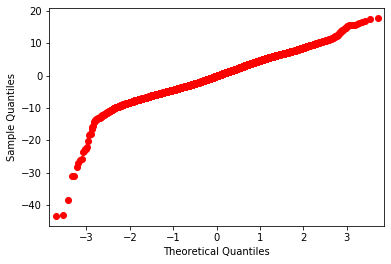

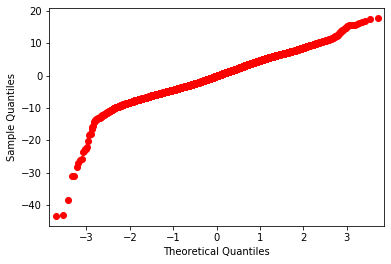

In [15]:
sm.qqplot(df['Resid'],color='r')

((array([-3.79967944, -3.57391754, -3.44994448, ...,  3.44994448,
          3.57391754,  3.79967944]),
  array([-43.43539373, -43.03584359, -38.35687614, ...,  16.8007967 ,
          17.42287291,  17.77771926])),
 (4.509644478448458, 4.154557260475787e-12, 0.989212398876157))

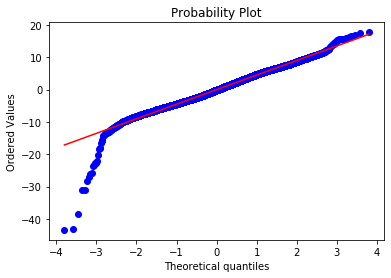

In [16]:
import pylab
scipystats.probplot(df['Resid'], dist="norm", plot=pylab)

We calculate value of the Anderson-Darling gauge.

In [18]:
import scipy
scipy.stats.anderson(df['Resid'], dist='norm' ) 

AndersonResult(statistic=9.20901667254293, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

We obtain statistics [15. , 10. , 5. , 2.5, 1. ].
If obtained statistic (statistic=9.20901667254293) is higher than critical parameters ( critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092])), then for appropriate level of significance (significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])), we able to reject zero hypothesis that say that it is normal distribution.

Anderson-Darling gauge says that the rest distribution have no normal character.

# Kołmogorowa-Smirnowa test

In [19]:
from scipy import stats
stats.kstest(df['Resid'], 'norm')

KstestResult(statistic=0.3311386887701732, pvalue=0.0)

Value of statistic is higher than p-value, that point the distribution of model rests are not normal distribution.

We made comparison the realisation and prediction.

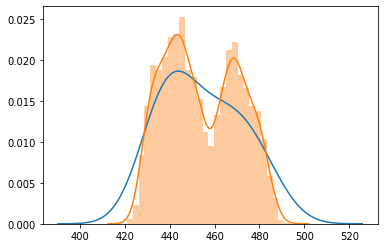

In [22]:
sns.kdeplot(np.array(df['Energy_output']), bw=10)
sns.distplot(np.array(df['Predict']))

# Test for homogeneity of the errors variance

One of the principles of regression is to stable, homogeneity values of model rests. When model is good for the variances should be homogeneous.

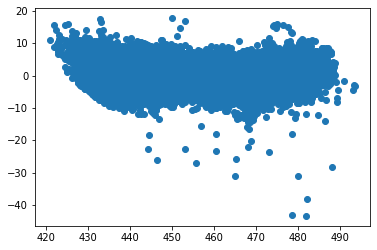

In [24]:
resid = lm.resid
plt.scatter(lm.predict(), resid)

The plot shows that part of errors have big dispersion, variance are not entirely homogeneous.

# Test for autocorrelation of the rests from the model

One of the fundamental principles of the linear regression model is independence of the errors of observations. The rest from the model should be not correlated among. Good fitted model assumed when the rests are independent among, their distribution is random, without any pattern.

One of the method to check random character of rests distribution is test r-Pearsona. Test check autocorrelation among errors. To this check Durbina-Watsona statistic is used. Value for ours model obtained in standard information sheet is 2.

Source of knowledge: http://www.naukowiec.org/wiedza/statystyka/test-durbina-watsona-niezaleznosc-bledow-obserwacji_423.html

In [26]:
import statsmodels
statsmodels.stats.stattools.durbin_watson(df['Resid'], axis=0)

2.0329358073274766

Statistic of the DW test is equal 2 (we got this information also from standard information sheet of the linear regression model). The DW test has from 0 to 4 range When value is going to 4 exist negativ  autocorrelation, when statistic come to 0, there are positive correlations among rests. Value 2 is pointing that no exist autocorrelation among errors.

# Test of collinearity among predictor variables

One of the fundamental principles of regression is lack of collinearity among independent variables. When two predictors are strongly among correlated, one of the variable loses their predictive power, loses to second predictor. Strong correlation among predictors lead to deterioration of the model parameters. 

We found out in previous part of publication that exist big correlation between two variables: Temperature (T) and Exhaust Vacuum (V). Now appear question which variable we would like to remove from the model. Good tool is the factor VIF (Variation Inflation Factor). Thanks to this factor we able to point which variable should be eliminated from the model.

In [27]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = smf.ols(formula = 'Energy_output ~ Temperature + Exhaust_Vacuum + Relative_Humidity + Ambient_Pressure', data = df).fit()
y, X = dmatrices('Energy_output ~ Temperature + Exhaust_Vacuum + Relative_Humidity + Ambient_Pressure', data = df, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

[43761.15186572733, 5.9776016741918685, 3.9430030401259746, 1.7052900320740478, 1.4526394006715817]


Result in form of vector represent variable in the certain order as in model. Recommendation of the VIF pointed, that if factor assigned to variable is more than 5, this variable is highly correlated with another variables and should be eliminated from the model.

Test showed that Temperature (T) variable should be removed from the model. This is confirmation of our conclusion from firs part of investigation, that there are existed detrimental collinearity between predictors.

# Ending conclusion

To effective use regression model to describe and next monitor production processes we need to deeply check of meet of fundamental principles of regression. This time we found our, we ought to remove one of the factor because exist predictor collinearity.


After eliminate this variable all work should be done ones again. 

It is possible to utilize one factor model using highly correlated variable with the result variable.